In [27]:
#biblioteka glove pobieranie i rozpakowywanie
!wget --no-check-certificate https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
!unzip glove.6B.zip



--2025-06-19 13:04:06--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

glove.6B.zip.1      100%[===================>] 822.24M  5.02MB/s    in 2m 39s  

2025-06-19 13:06:45 (5.18 MB/s) - ‘glove.6B.zip.1’ saved [862182613/862182613]

Archive:  glove.6B.zip
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace glove.6B.100d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace glove.6B.200d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace glove.6B.300d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [28]:
!ls
!pwd

glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip    sample_data
glove.6B.200d.txt  glove.6B.50d.txt   glove.6B.zip.1
/content


In [29]:
import numpy as np
import numpy as np, io, matplotlib.pyplot as plt
from scipy import spatial

In [30]:
# wektory glove
embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('%s word vectors.' % len(embeddings_index))

400000 word vectors.


In [31]:
embeddings_dict = {}
with io.open('glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        word, *vec = line.split()
        embeddings_dict[word] = np.asarray(vec, dtype='float32')


In [32]:
#https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db

def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))


In [33]:
#średni wektor
all_vecs = np.stack(list(embeddings_dict.values()))
average_vec = all_vecs.mean(axis=0)

print( len(embeddings_dict), 'words; UNK shape =', average_vec.shape)

400000 words; UNK shape = (100,)


In [34]:
# definicje klas
classes = {
    "Gender": [
        ("king", "queen"), ("man", "woman"),
        ("actor", "actress"), ("prince", "princess"), ("emperor", "empress")
    ],

    "Past-Tense": [
        ("bring", "brought"), ("get", "got"),
        ("see", "saw"), ("go", "went"), ("take", "took")
    ],

    "Singular-Plural": [
        ("apple", "apples"), ("child", "children"),
        ("mouse", "mice"), ("person", "people"), ("ox", "oxen")
    ],

    "Country-Capital": [
        ("france", "paris"), ("japan", "tokyo"),
        ("canada", "ottawa"), ("brazil", "brasilia"), ("australia", "canberra")
    ],

    "Comparative-Superlative-Mixed": [
        ("fast", "faster"), ("hot", "hottest"),
        ("big", "bigger"), ("good", "better"), ("early", "earliest")
    ],

    "Tool-User": [
        ("pen", "writer"), ("hammer", "carpenter"),
        ("camera", "photographer"), ("microscope", "scientist"), ("brush", "painter")
    ],

    "Currency-Country": [
        ("dollar", "usa"), ("euro", "germany"),
        ("yen", "japan"), ("rupee", "india"), ("peso", "mexico")
    ],

    "Synonym": [
        ("happy", "joyful"), ("sad", "sorrowful"),
        ("big", "large"), ("tiny", "small"), ("smart", "intelligent")
    ],

    "Antonym": [
        ("hot", "cold"), ("light", "dark"),
        ("old", "young"), ("rich", "poor"), ("love", "hate")
    ],

    "Profession-Object": [
        ("chef", "knife"), ("writer", "book"),
        ("gardener", "shovel"), ("teacher", "textbook"), ("driver", "car")
    ],
    "Animal-Baby": [
    ("cow",   "calf"),    ("cat",   "kitten"),    ("dog",   "puppy"),
    ("horse", "foal"),    ("duck",  "duckling")
   ]
}


In [35]:
terms = [w for pairs in classes.values() for pair in pairs for w in pair]
#PCA
#przygotowanie danych
X = np.stack([embeddings_dict.get(w, average_vec) for w in terms])

X = X - np.mean(X, axis=0)
X = X / np.std(X, axis=0)
#svd współrzędne 2d
U, Sigma, VT = np.linalg.svd(X)
Sigma_full = np.zeros((X.shape[0], X.shape[1]))
np.fill_diagonal(Sigma_full, Sigma)

print("\nLeft singular vectors (U):")
print(U)
print("\nSingular values (Sigma diagonal):")
print(Sigma)
print("\nSigma as 100×100 matrix:")
print(Sigma_full)
print("\nRight singular vectors (VT):")
print(VT)

print("\nChecks:")
print((U.T @ U)[:4,:4])
print((VT.T @ VT)[:4,:4])

XV = U @ Sigma_full
x, y = XV[:, 0], XV[:, 1]

coord_map = {w: (x[i], y[i]) for i, w in enumerate(terms)}



Left singular vectors (U):
[[-0.01254008  0.11858601 -0.05523131 ...  0.06300419  0.03350358
  -0.10389751]
 [-0.02782218  0.12057019 -0.06297396 ...  0.07613257  0.07303551
   0.0771231 ]
 [-0.06728165  0.08672318  0.08035178 ...  0.02595625 -0.01658952
  -0.02770483]
 ...
 [-0.10881641 -0.09243484 -0.17873715 ...  0.07387     0.00615327
  -0.03843739]
 [-0.06185748 -0.11404248 -0.13970979 ...  0.0153874   0.06842833
  -0.05825418]
 [-0.09763443 -0.10163167 -0.12549481 ...  0.07512156  0.08211266
   0.03943317]]

Singular values (Sigma diagonal):
[31.835047   30.142572   25.671654   24.27279    22.439342   20.832731
 19.910112   19.38183    18.842566   18.3018     17.851137   17.131437
 16.625233   15.69393    15.162817   15.0013275  14.515704   13.840877
 13.479649   13.306991   12.935683   12.47636    12.362514   11.987005
 11.734627   11.181116   10.854826   10.501531   10.2231865   9.8869095
  9.696225    9.62332     9.5415125   9.262537    9.11664     8.795639
  8.602421    8.34

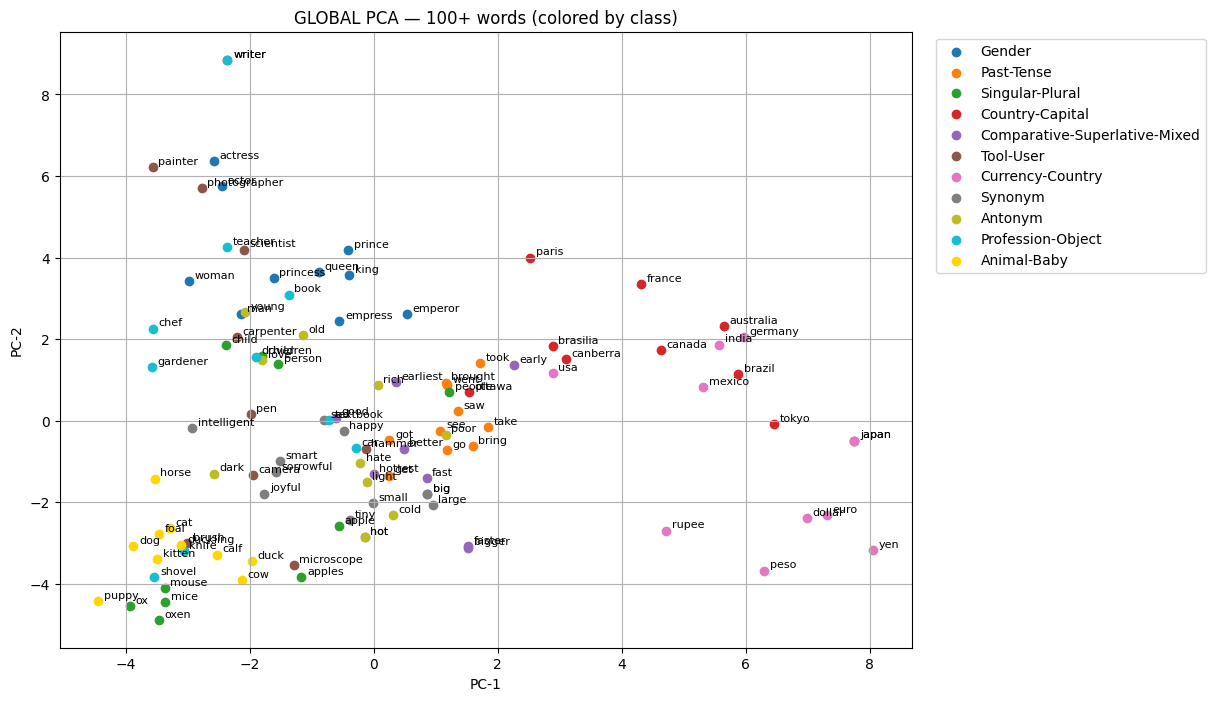

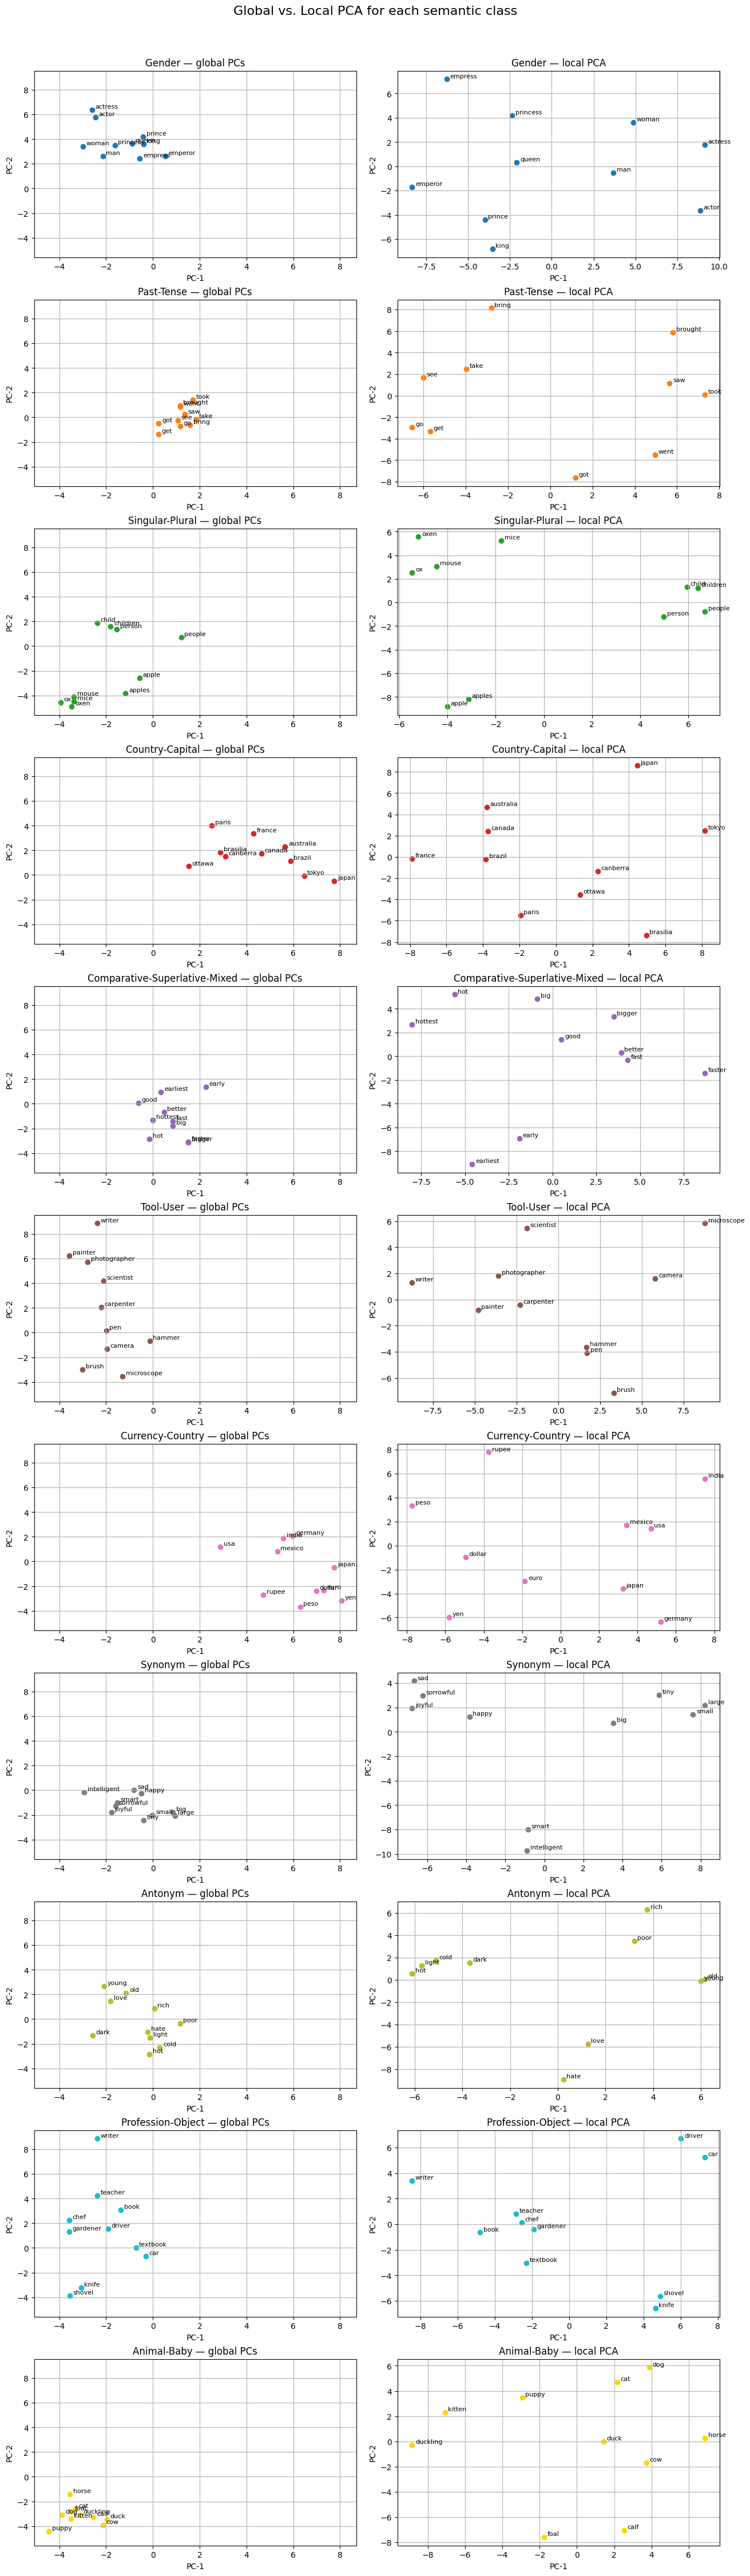

In [36]:
# wykresy global + lokalny pca
from sklearn.decomposition import PCA
import itertools

palette = itertools.cycle(
    ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple",
     "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan", "gold"]
)
class_colors = {c: next(palette) for c in classes}

plt.figure(figsize=(11, 8))

offset = 0
for cname, pairs in classes.items():
    words = [w for p in pairs for w in p]
    idx   = slice(offset, offset + 10)
    plt.scatter(x[idx], y[idx], color=class_colors[cname], label=cname)
    for xi, yi, w in zip(x[idx], y[idx], words):
        plt.annotate(w, (xi, yi), xytext=(4, 2),
                     textcoords='offset points', fontsize=8)
    offset += 10

plt.title("GLOBAL PCA — 100+ words (colored by class)")
plt.xlabel("PC-1"); plt.ylabel("PC-2"); plt.grid(True)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")

xlim = plt.xlim()
ylim = plt.ylim()
plt.show()
plt.close()

coord_map = {w: (x[i], y[i]) for i, w in enumerate(terms)}

fig, axes = plt.subplots(
    nrows=len(classes), ncols=2,
    figsize=(13, 4 * len(classes)),
    constrained_layout=True
)

for row, (cname, pairs) in enumerate(classes.items()):
    words = [w for p in pairs for w in p]
    col   = class_colors[cname]

    ax_g = axes[row, 0]
    xs, ys = zip(*[coord_map[w] for w in words])
    ax_g.scatter(xs, ys, color=col)
    for xi, yi, w in zip(xs, ys, words):
        ax_g.annotate(w, (xi, yi), xytext=(4, 2),
                      textcoords='offset points', fontsize=8)
    ax_g.set_xlim(xlim); ax_g.set_ylim(ylim)
    ax_g.set_title(f"{cname} — global PCs")
    ax_g.set_xlabel("PC-1"); ax_g.set_ylabel("PC-2"); ax_g.grid(True)

    ax_l = axes[row, 1]
    Xc = np.stack([embeddings_dict.get(w, average_vec) for w in words])
    Xc = (Xc - Xc.mean(axis=0)) / Xc.std(axis=0)
    xl, yl = PCA(n_components=2, random_state=0).fit_transform(Xc).T

    ax_l.scatter(xl, yl, color=col)
    for xi, yi, w in zip(xl, yl, words):
        ax_l.annotate(w, (xi, yi), xytext=(4, 2),
                      textcoords='offset points', fontsize=8)
    ax_l.set_title(f"{cname} — local PCA")
    ax_l.set_xlabel("PC-1"); ax_l.set_ylabel("PC-2"); ax_l.grid(True)

plt.suptitle("Global vs. Local PCA for each semantic class",
             fontsize=16, y=1.02)
plt.show()


In [37]:
# https://github.com/spro/practical-pytorch/blob/master/glove-word-vectors/glove-word-vectors.ipynb?utm_source=chatgpt.com

!pip -q install torchtext==0.17

import torch, torchtext.vocab as vocab

glove = vocab.GloVe(name='6B', dim=100)
print(len(glove.itos), 'words')

def get_word(word):
    return glove.vectors[glove.stoi[word]]

def closest(vec, n=10):
    """
    Find the closest words for a given vector
    """
    all_dists = [(w, torch.dist(vec, get_word(w))) for w in glove.itos]
    return sorted(all_dists, key=lambda t: t[1])[:n]

def print_tuples(tuples):
    for tuple in tuples:
        print('(%.4f) %s' % (tuple[1], tuple[0]))


def analogy(w1, w2, w3, n=5, filter_given=True):
    print('\n[%s : %s :: %s : ?]' % (w1, w2, w3))

    # w2 - w1 + w3 = w4
    closest_words = closest(get_word(w2) - get_word(w1) + get_word(w3))

    # filter out given words
    if filter_given:
        closest_words = [t for t in closest_words if t[0] not in [w1, w2, w3]]

    print_tuples(closest_words[:n])



400000 words


In [38]:
plan = {}
for cname, pairs in classes.items():
    A, B = pairs[0]
    C    = pairs[1][0]
    plan[cname] = (A, B, C)

for cname, (A, B, C) in plan.items():
    print(f'\n {cname}')
    analogy(A, B, C, n=5, filter_given=True)


 Gender

[king : queen :: man : ?]
(4.0811) woman
(4.6916) girl
(5.2703) she
(5.2788) teenager
(5.3084) boy

 Past-Tense

[bring : brought :: get : ?]
(2.5004) got
(3.2732) getting
(3.3921) turned
(3.4328) went
(3.4595) came

 Singular-Plural

[apple : apples :: child : ?]
(6.2178) newborn
(6.2818) children
(6.3706) infant
(6.6122) pregnant
(6.6741) newborns

 Country-Capital

[france : paris :: japan : ?]
(3.2209) tokyo
(4.7946) osaka
(5.2041) japanese
(5.2369) seoul
(5.5598) shanghai

 Comparative-Superlative-Mixed

[fast : faster :: hot : ?]
(4.8363) hotter
(5.1018) cool
(5.3030) cooler
(5.5436) heat
(5.6452) cooled

 Tool-User

[pen : writer :: hammer : ?]
(6.7628) author
(6.7724) screenwriter
(6.8295) writers
(6.9850) christopher
(7.0489) journalist

 Currency-Country

[dollar : usa :: euro : ?]
(6.4577) oceania
(6.4638) qualifiers
(6.7347) holland
(6.7501) canada
(6.7568) netherlands

 Synonym

[happy : joyful :: sad : ?]
(4.5060) sorrowful
(4.8868) poignant
(4.9599) joyous
(5.0

In [39]:
# https://github.com/spro/practical-pytorch/blob/master/glove-word-vectors/glove-word-vectors.ipynb
# COSINUS
!pip -q install torchtext==0.17

import torch, torchtext.vocab as vocab
import torch.nn.functional as F

glove = vocab.GloVe(name='6B', dim=100)
print(len(glove.itos), 'words')

def get_word(word):
    return glove.vectors[glove.stoi[word]]

def closest(vec, n=10):
    """
    Find the closest words for a given vector
    (metryka cosinus)
    """
    all_dists = [
        (w, 1.0 - F.cosine_similarity(vec, get_word(w), dim=0).item())
        for w in glove.itos
    ]
    return sorted(all_dists, key=lambda t: t[1])[:n]

def print_tuples(tuples):
    for tup in tuples:
        print('(%.4f) %s' % (tup[1], tup[0]))

def analogy(w1, w2, w3, n=5, filter_given=True):
    print('\n[%s : %s :: %s : ?]' % (w1, w2, w3))

    # w2 - w1 + w3 = w4
    vec_target = get_word(w2) - get_word(w1) + get_word(w3)
    closest_words = closest(vec_target, n + 3)

    if filter_given:
        closest_words = [t for t in closest_words if t[0] not in {w1, w2, w3}]

    print_tuples(closest_words[:n])


400000 words


In [40]:
#COSINUS
plan = {}
for cname, pairs in classes.items():
    A, B = pairs[0]
    C    = pairs[1][0]
    plan[cname] = (A, B, C)

for cname, (A, B, C) in plan.items():
    print(f'\n{cname}')
    analogy(A, B, C, n=5, filter_given=True)



Gender

[king : queen :: man : ?]
(0.1960) woman
(0.2651) girl
(0.3182) she
(0.3408) her
(0.3458) mother

Past-Tense

[bring : brought :: get : ?]
(0.0971) got
(0.1704) getting
(0.1890) turned
(0.1923) went
(0.1929) had

Singular-Plural

[apple : apples :: child : ?]
(0.3837) children
(0.4020) newborn
(0.4217) infant
(0.4514) pregnant
(0.4585) babies

Country-Capital

[france : paris :: japan : ?]
(0.1078) tokyo
(0.2581) osaka
(0.2914) japanese
(0.3140) seoul
(0.3436) shanghai

Comparative-Superlative-Mixed

[fast : faster :: hot : ?]
(0.3307) hotter
(0.3767) cool
(0.3872) heat
(0.4059) cooler
(0.4232) temperature

Tool-User

[pen : writer :: hammer : ?]
(0.4135) writers
(0.4175) author
(0.4213) screenwriter
(0.4529) producer
(0.4547) journalist

Currency-Country

[dollar : usa :: euro : ?]
(0.4238) oceania
(0.4294) qualifiers
(0.4622) uefa
(0.4693) netherlands
(0.4700) canada

Synonym

[happy : joyful :: sad : ?]
(0.2449) sorrowful
(0.3133) poignant
(0.3293) joyous
(0.3371) mournful




Analyze and interpret your 21 plots.

Na globalnej "mapie" dwóch pierwszych składowych PCA widzimy, że Country-Capital, Currency-Country, Gender są najbardziej oddzielone od pozostałych klas. Najmniej oddzielone, a tak naprawdę wymieszane z innymi są Tool-User, Antonym, Synonym.

Jeśli patrzymy na Global vs Local dla pewnej klasy, to prawie zawsze widzimy, że na Local punkty są rozrzucone, rozproszone: typowo maksymalna różnica w pionie (PC-2) jest około 14 i w poziomie jest tak samo, czyli maksymalna różnica pomiędzy słowami względem PC-1 jest około 14. Natomiast w przypadku klasy na Global widać, że prawie każda klasa jest skupiona na obszarze 6*6, czyli średnio te rozrzuty wynoszą około < 6  w pionie i tak samo w poziomie < 6.

Does PCA capture semantic differences?

W większości przypadków tak PCA wychwytuje różnice semantyczne, co wynika z opisów poniżej. Dokładniej mówiąc, PCA dobrze zachowuje relacje morfologiczne i płciowe.  Z kolei relacje encyklopedyczne, takie jak waluta-państwo albo narzędzie-użytkownik, gubią się w dwóch pierwszych składowych PCA.

Local:

Tak, na przykład w przypadku Gender formy żeńskie są u góry (PC-2>0), a męskie na dole (PC-2< 0).

W przypadku Past-Tense, formy past są po prawej stronie (PC-1>0), gdyż present są po lewej (PC-1< 0).

Dla Singular-Plural widać, że plural zawsze jest po lewej względem singular tego samego słowa, czyli nie ma aż takiego wyraźnego podziału jak w pierwszych dwóch przypadkach.

W przypadku Country-Capital jakby istnieje niewidoczna prosta x=y (czyli PC-1=PC-2), stolice leżą poniżej tej prostej, a kraje powyżej.

W pryzpadku Comparative-Superlative-Mixed widzimy sytuację podobną do Singular-Plural, tylko w tym przypadku mamy sufiksy, słowa z "est" są po lewej względem oryginalnego słowa, gdyż z "er" są po prawej względem oryginalnego słowa.

Dla Tool-User Tool jest zawsze po prawej względem User oraz tak samo jak w przypadku Country-Capital istnieje niewidoczna prosta x=y (czyli PC-1=PC-2), Tools lezą poniżej tej prostej, a Users powyżej.

W przypadku Currency-Country kraje są po prawej (PC-1>0), gdyż waluta jest po lewej (PC-1< 0). Odległości pomiędzy odpowiednią walutą i krajem są prawie zawsze takie same: na osi PC-1 są podobne (8-12), na osi PC-2 około 0.7-1.7.

W przypadku Synonym odpowiednie słowa są dość blisko siebie: PC-2 >=1, PC-1 >= 2.5.

W przypadku Antonym sytuacja jest podobna do Synonym, czyli odpowiednie słowa są dość blisko siebie: PC-2 >=1.5, PC-1 >= 1.5.

Dla Profession-Object sytuacja wygląda nieco chaotycznie, czyli raczej nie da się powiedzieć, że wszystkie słowa z tej klasy są w jakiś sposób spójnie uporząkowane, tak jak w przypadku pozostałych klas.

Animal-Baby: formy dorosłe są w prawej górnej ćwiartce (PC-1 > 0, PC-2 > -2), a formy Baby są w pozostałych.

Global:

Gender: odpowiednie słowa są blisko siebie.

Past-Tense: odpowiednie słowa są blisko siebie, ale podział nie jest wyraźny.

Singular-Plural: odpowiednie słowa są dość blisko siebie, ale podział nie jest dostatecznie wyraźny.  

Country-Capital: odpowiednie słowa są blisko siebie, ale podział nie jest wyraźny.

Comparative-Superlative-Mixed: odpowiednie słowa są blisko siebie, ale podział nie jest wyraźny.

Tool-User Tool: Tools powyżej 0 (PC-2 ), oraz nieco są po prawej, Users poniżej 0, są w lewym dolnym rogu.

Currency-Country: Widoczny pozdiał, waluty są po prawej i powyżej (PC-2 > -2), kraje - po lewej i poniżej (PC-2 < -2).

Synonym: odpowiednie słowa są blisko siebie.

Antonym: odpowiednie słowa są blisko siebie, ale podział nie jest wyraźny.

Profession-Object: większość Objects jest po prawej oraz wyżej niż wszystkie Professions.

Animal-Baby: odpowiednie słowa są blisko siebie, ale podział nie jest wyraźny.

Z opisów powyżej w jasny sposób wynika, że stosunki pomiędzy wektorami nie są zachowane, jeśli porównujemy wykresy Global i Local.  

Gender, Past-Tense, Comparative:
W tych przypadkach dostajemy poprawną odpowiedź na 1-2 miejscu. To wynika z tego, że różnicę +płeć żeńska, +czas przeszły czy +końcówka -er można opisać jednym wektorem przesunięcia. Takich przykładów jest dużo w danych, więc GloVe łatwo się tego uczy.

Singular-Plural:
Children jest na 2. Słowo child często pojawia się w tekstach obok newborn czy infant, pregnant mother, etc. Te wyrazy mają bardzo podobne wektory do children, dlatego są wyżej w rankingu. Relacja liczby jest zachowana, ale "szum" przesuwa wynik

Country-Capital:
arytmetyka działa. Nazwy stolic i krajów często pojawiają się razem w wiadomościach politycznych. Czyli wektor +stolica jest dość "wyraźny", dlatego Japonia-Tokio wychodzi bez problemu, a kolejne są też miasta (Osaka, Seul).

Tool-User, Currency-Country i Profession-Object:
słabo działa arytmetyka, bo nie wynikają z gramatycznej transformacji, typu dodania sufiksu, prefiksu i td. Są to relacje czysto semantyczne, a nawet encyklopedyczne (czyli trzeba zrozumieć sens i częstotliwość występowania tych słów obok jest mniejsza).


Jeśli różnica między słowami jest powtarzalna pod względem budowy słowa (morfologia, płeć, oczywiste stopniowanie) arytmetyka działa lepiej. Gdy relacja wymaga wiedzy encyklopedycznej, słowa te pojawiają się w różnorodnych kontekstach, wtedy arytmetyka działa gorzej.



Bibliografia

https://medium.com/%40pasdan/visualize-word-embeddings-with-pca-decomposition-using-scikit-learn-pipelines-2ec28c29b029

https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db

https://nlp.stanford.edu/projects/glove/

https://pmigdal.medium.com/king-man-woman-is-queen-but-why-251cb1adac24

https://stackoverflow.com/questions/50060241/how-to-use-glove-word-embeddings-file-on-google-colaboratory?

https://stackoverflow.com/questions/49239941/what-is-unk-in-the-pretrained-glove-vector-files-e-g-glove-6b-50d-txt?
